<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Mean Absolute Error: 970043.4039201637
Mean Squared Error: 1754318687330.6616
Root Mean Squared Error: 1324506.960091438


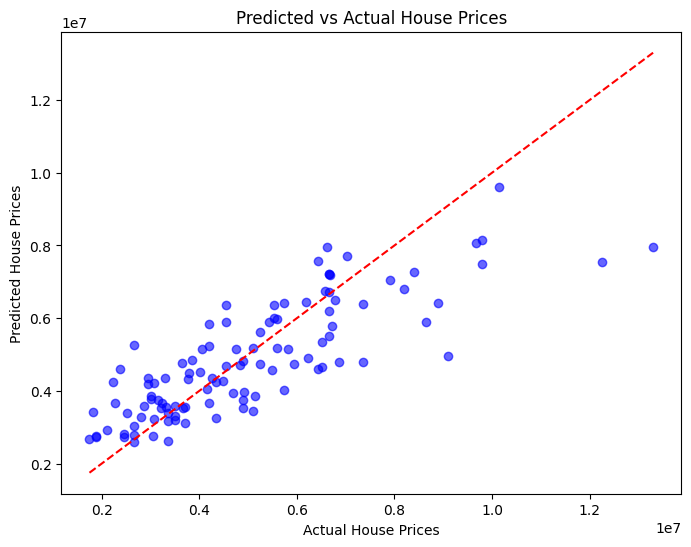

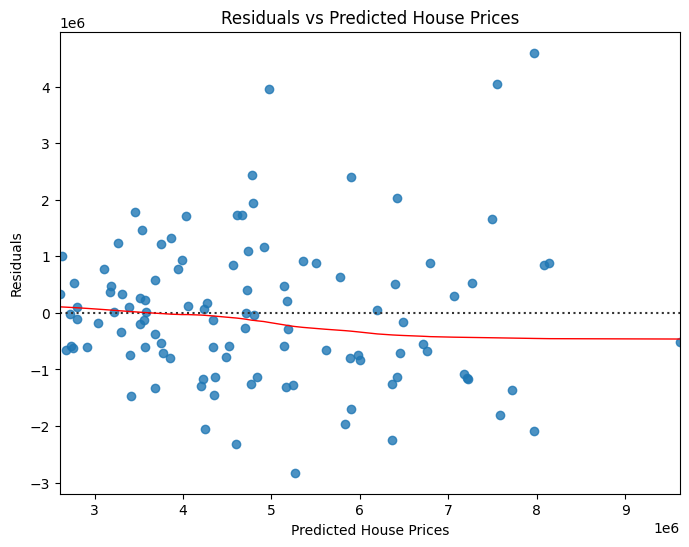

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Load the dataset
data = pd.read_csv('/content/Housing.csv')

# Step 2: Data Exploration and Preprocessing
# Check for missing values
print(data.isnull().sum())

# Print the columns in your DataFrame to verify the correct column name
print(data.columns)

# Identify categorical columns (e.g., columns containing strings)
categorical_cols = data.select_dtypes(include=['object']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the categorical columns and transform them
encoded_data = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_df], axis=1)

# Assuming 'price' is the target variable and the rest are features
X = data.drop(columns=['price'])
y = data['price']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 7: Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Step 8: Plotting

# 1. Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
# Use only y_pred for x-axis in residplot to plot residuals against fitted values
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Predicted House Prices')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.show()

BONUS ASSIGNMENT


Linear Regression Performance:
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000

KNN (k=3) Performance:
MAE: 0.1284, MSE: 0.0612, RMSE: 0.2473

KNN (k=5) Performance:
MAE: 0.1651, MSE: 0.0727, RMSE: 0.2696

KNN (k=7) Performance:
MAE: 0.1887, MSE: 0.0824, RMSE: 0.2870

KNN (k=9) Performance:
MAE: 0.2018, MSE: 0.0852, RMSE: 0.2918

KNN (k=11) Performance:
MAE: 0.2118, MSE: 0.0920, RMSE: 0.3034



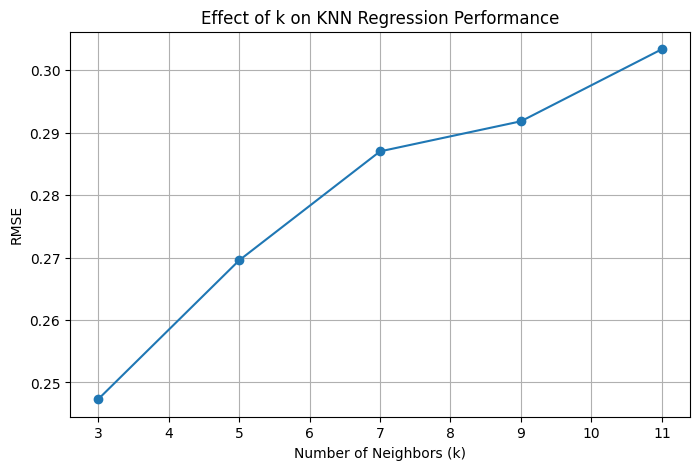

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset (Replace 'your_dataset.csv' with actual dataset file)
df = pd.read_csv('/content/Housing.csv')

# Identify categorical columns (e.g., columns containing strings)
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for numpy array

# Fit the encoder on the categorical columns and transform them
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

# Assuming the last column is the target variable
y = df.iloc[:, -1].values # Now 'price' column should be the last after one-hot encoding
X = df.iloc[:, :-1].values # All columns except 'price'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train and evaluate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}\n")

# Experiment with different values of k
k_values = [3, 5, 7, 9, 11]
errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)

    errors.append((k, mae_knn, mse_knn, rmse_knn))
    print(f"KNN (k={k}) Performance:")
    print(f"MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}\n")

# Convert results to a DataFrame for visualization
errors_df = pd.DataFrame(errors, columns=["k", "MAE", "MSE", "RMSE"])

# Plot the effect of k on RMSE
plt.figure(figsize=(8, 5))
plt.plot(errors_df['k'], errors_df['RMSE'], marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('Effect of k on KNN Regression Performance')
plt.grid()
plt.show()
